<a href="https://colab.research.google.com/github/ola-sumbo/Hamoye-Internship/blob/master/Copy_of_Stage_E_Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from pandas import read_csv
import urllib
import requests
import matplotlib.pyplot as plt

In [4]:
import zipfile, urllib.request, shutil

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
file_name = 'myzip.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

In [6]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [7]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [8]:
dataset = df.astype('float32')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB


In [9]:
df.shape

(2075259, 7)

In [10]:
df.describe()
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

# fill missing values with a value at the same time one day ago
def fill_missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]

In [12]:
for i in range(1, 7): 
  print(df.iloc[:, i].unique())  # there are visibly missing values still

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

**Dealing with Missing Values**

In [13]:
# finding columns that have nan
dropping_all_nan = []
for i in range(0, 7):
  if not df.iloc[:, i].notnull().all():
    dropping_all_nan.append(i)

dropping_all_nan

[0, 1, 2, 3, 4, 5, 6]

In [14]:
print(df.iloc[:, i].unique())  # missing number persist

[17. 16. 18.  9.  0.  5. 19. 10. 20.  8.  4.  2.  3. 11. 13.  6. 15. nan
 12.  1. 14.  7. 23. 25. 26. 28. 27. 21. 22. 29. 24. 30. 31.]


In [16]:
# filling nan with means
for i in range(0,7):
  df.iloc[:,i]= df.iloc[:,i].fillna(df.iloc[:, i].mean())

# check for nan again
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
df.describe()
df['Global_active_power'].resample('Y').sum()

dt
2006-12-31     41817.648460
2007-12-31    586999.324708
2008-12-31    565040.462030
2009-12-31    566987.310356
2010-12-31    504539.183478
Freq: A-DEC, Name: Global_active_power, dtype: float64

In [18]:
values = df.values
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6]) 
# save updated dataset
df.to_csv('household_power_consumption.csv')

**Inspect Data trends using Visualisation**

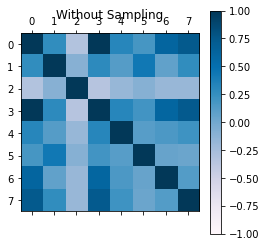

In [19]:
from matplotlib import pylab as pl
plt.matshow(df.corr(method='spearman'),vmax=1, vmin=-1, cmap='PuBu')
plt.title('Without Sampling')
pl.colorbar()
plt.show()

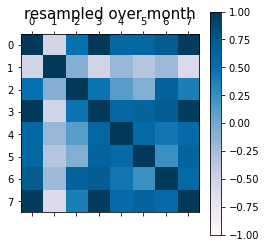

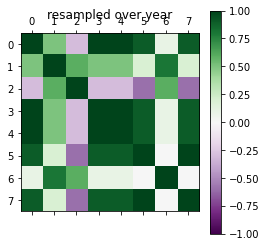

In [20]:
plt.matshow(df.resample('M').mean().corr(method='spearman'), vmax=1, vmin=-1, cmap = 'PuBu')
plt.title('resampled over month', size=15)
pl.colorbar()
plt.margins(0.03)
plt.matshow(df.resample('A').mean().corr(method='spearman'), vmax=1, vmin=-1, cmap='PRGn')
plt.title('resampled over year')
pl.colorbar()
plt.show()


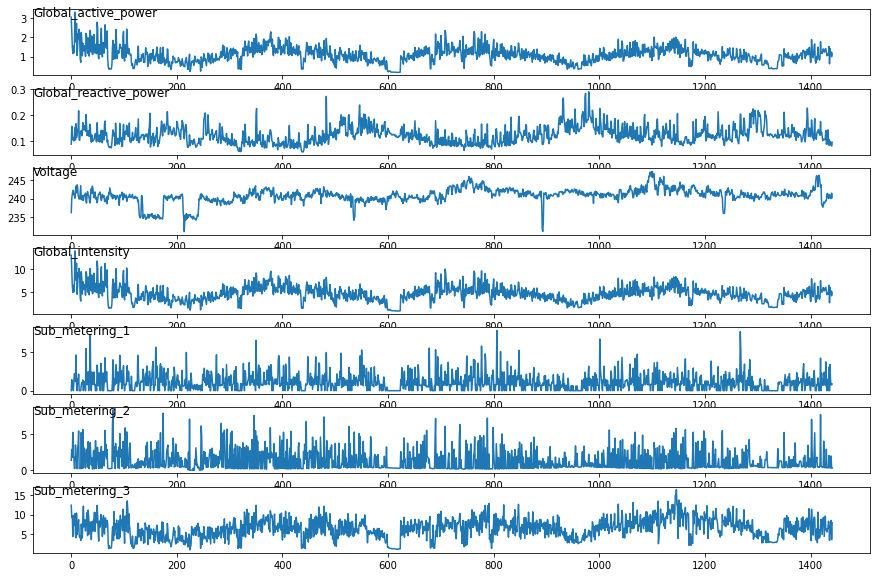

In [21]:
# for column 1 to 6, we would plot the graph for each energy attribute 
cols = [ 0, 1, 2, 3, 4, 5, 6 ]
i = 1
alldata = df.resample('D').mean().values
# plot over the cols
plt.figure(figsize= (15, 10))
for j in cols:
    plt.subplot(len(cols), 1, i) # starting from one to i 
    plt.plot(alldata[:, j])
    plt.title(df.columns[j], y = 0.8, loc='left')
    i += 1

plt.show()
# plot show that all features are stationary 

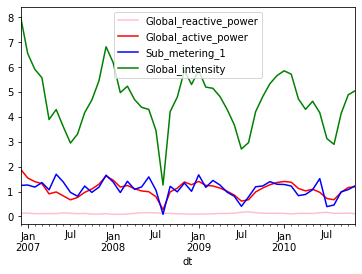

In [22]:
# Further Inspection 
# I will resample my plot to daily values to inspect times series plot
df.Global_reactive_power.resample('M').mean().plot(color='pink', legend=True)
df.Global_active_power.resample('M').mean().plot(color='red', legend=True )
df.Sub_metering_1.resample('M').mean().plot(color='blue', legend =True)
df.Global_intensity.resample('M').mean().plot(color ='g', legend = True)
#df.Sub_metering_2.resample('D').mean().plot(color='orange', legend = True)
plt.show()

**Evaluation, Training and a Forward Work Evaluation**

In [23]:
# resample data to daily frequency
daily_groups = df.resample('D')
daily_data = daily_groups.sum()
print(daily_data.shape)
print(daily_data.head())

(1442, 8)
            Global_active_power  ...  sub_metering_4
dt                               ...                
2006-12-16             1209.176  ...    14680.933333
2006-12-17             3390.460  ...    36946.666667
2006-12-18             2203.826  ...    19028.433333
2006-12-19             1666.194  ...    13131.900000
2006-12-20             2225.748  ...    20384.800000

[5 rows x 8 columns]


In [24]:
# create a function to evaluate forecast
def evaluate_forecasts(true, predictued):
  scores = list()
  # Calculate Root mean square error for each day
  for i in range(true.shape[1]):
    # calculate Mean square error 
    mse = mean_squared_error(true[:, i], predicted[:,i])
    # calculate root mean square 
    rmse = sqrt(mse)
    # store it
    scores.append(rmse)
    # calculate overall RMSE
    k = 0
    for row in range(true.shape[0]):
      for col in range(true.shape[1]):
        s+= (true[row, col] - predicted[row - col])**2
      score = sqrt(k/(true.shape[0] * true.shape[1]))
      return score, scores

**Train-Test**

In [21]:
# split the univarite timeseries into test and train
def split_dataset(data):
  #split into standard weeks
  train, test = data[1 : -445], data[-445 : -6]
  # arrange into structure for weekly data
  train = array(split(train, len(train)/7))
  test = array(split(test, len(test)/7))
  return train, test

In [ ]:
#train, test = np.split(df.values, [int(.8 *len(df))])
#validate train data
#print(train.shape) just checking stuff

In [22]:
train, test = np.split(daily_data.values, [int(.8*len(daily_data))])
print(train.shape)
#train = train.astype('int64')
# validate test
print(test.shape)

(1153, 8)
(289, 8)


In [23]:
# converting training data into series
import pandas as Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(df.Global_active_power, df.Global_reactive_power)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.247


In [26]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fbprophet import Prophet as proph

play = pd.DataFrame(data=df["Global_active_power"])
play.rename(columns={"index": "ds"}, inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [32]:
from pandas import to_datetime
play = play.rename(columns={'dt':'ds', 'Global_active_power' : 'y'})
play

,y
dt,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666
...,...
2010-11-26 20:58:00,0.946
2010-11-26 20:59:00,0.944
2010-11-26 21:00:00,0.938


In [ ]:
# create test dataset, remove last 36 months
#train = play.drop(play.index[-36:])
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = play.values[:-36]
test = play.values[36:]

In [ ]:
!pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

     |████████████████████████████████| 1.5MB 3.5MB/s 
     |████████████████████████████████| 8.7MB 6.4MB/s 
     |████████████████████████████████| 808kB 45.5MB/s 
     |████████████████████████████████| 2.1MB 38.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:


In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

**Using Facebook Phophet**[link text](https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8)

In [2]:
from fbprophet import Prophet 
import pandas as pd

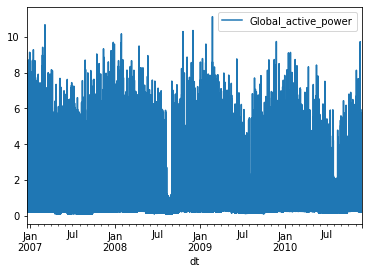

In [33]:
#df['date'] = pd.to_datetime(df['dt'])
#https://stackoverflow.com/questions/42894058/attributeerror-dataframe-object-has-no-attribute-datetime
#data['date'] = data['dt'].astype(np.int64) // 10**9
data = df.loc[:, ['Global_active_power']]
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], downcast='float', errors='coerce')
data.plot()

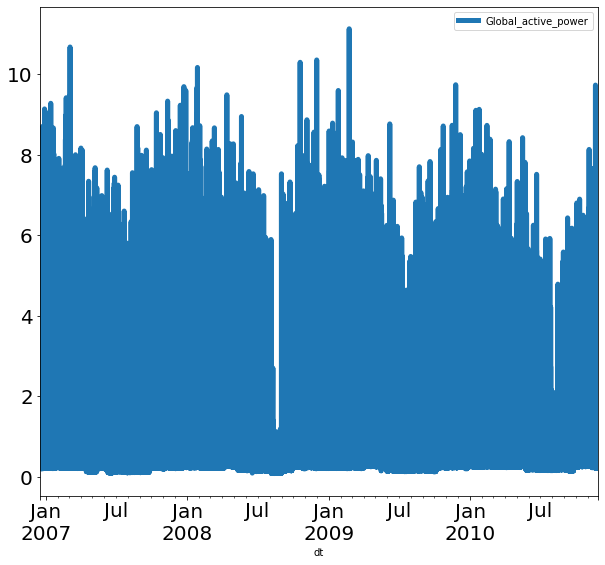

In [34]:
df = data.groupby(['dt']).sum().reset_index()
df.plot.line(x='dt', y='Global_active_power', figsize=(10,9), linewidth=5, fontsize=20)
plt.show()

In [35]:
dfp = df
dfp.reset_index(inplace=True)
dfp = dfp.rename(columns={'dt':'ds', 'Global_active_power':'y'})
dfp.head()

,index,ds,y
0,0,2006-12-16 17:24:00,4.216
1,1,2006-12-16 17:25:00,5.360
2,2,2006-12-16 17:26:00,5.374
3,3,2006-12-16 17:27:00,5.388
4,4,2006-12-16 17:28:00,3.666


In [ ]:
import fbprophet
dfp_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10)
dfp_prophet.fit(dfp)

In [ ]:
# make future forecast from two months
dfp_forecast = dfp_prophet.make_future_dataframe(periods = 30*2, freq = 'D')
# make predictions 
dfp_forecast = dfp_prophet.predict(dfp_forecast)

In [ ]:
#plotting fbp
dfp.phophet.plot(dfp_forecast, xlabel='Date', ylabel='Global_Active_Power')
plt.title('Global Test')